# First ML Project

#### Using the BMI index to predict weight using height

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#Reading thye csv file
df = pd.read_csv('BMI.csv').reset_index(drop=True)
df.head()

,Index,Height,Weight
0,0,65.78,112.99
1,1,71.52,136.49
2,2,69.40,153.03
3,3,68.22,142.34
4,4,67.79,144.30


In [25]:
# check for null values
df.isnull().sum()

Index     0
Height    0
Weight    0
dtype: int64

In [26]:
# Check for duplicates
df.drop_duplicates(inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_10020\1819189651.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Height'], df['Weight'], cmap='summer', marker='o')


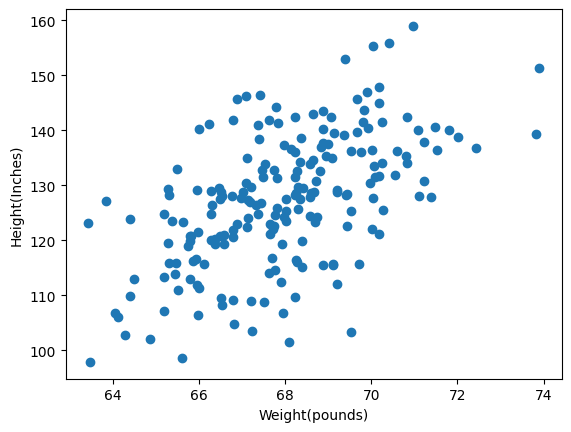

In [31]:
plt.scatter(df['Height'], df['Weight'], cmap='summer', marker='o')
plt.xlabel('Weight(pounds)')
plt.ylabel('Height(Inches)')
plt.show()

In [32]:
corr = df.corr()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   200 non-null    int64  
 1   Height  200 non-null    float64
 2   Weight  200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [45]:
from sklearn.model_selection import train_test_split
X = df[['Weight']]
y = df[['Height']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=34)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((150, 1), (50, 1), (150, 1), (50, 1))

In [46]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train  = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test) #The mean and SD are taken from the training data so we just transform the test data


In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
# Printing coeff and intercept
print(f'Coeff : {model.coef_}')
print(f'Intercept : {model.intercept_}')

Coeff : [[1.18285348]]
Intercept : [67.81393333]


In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f'mean squared error:{mean_squared_error(y_pred, y_test)}')
print(f'mean absolute error:{mean_absolute_error(y_pred, y_test)}')
print(f'r2 score:{r2_score(y_pred, y_test)}')

mean squared error:3.10503494866822
mean absolute error:1.426214629114633
r2 score:-0.7853504670372948


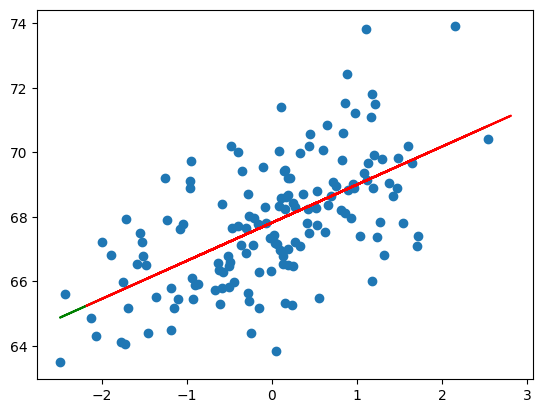

In [62]:
#Plotting the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='g')
plt.plot(X_test, y_pred, color='r')


In [64]:
## Now using polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [65]:
model.fit(poly_X_train, y_train)

LinearRegression()

C:\Users\pc\AppData\Local\Temp\ipykernel_10020\2409124911.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


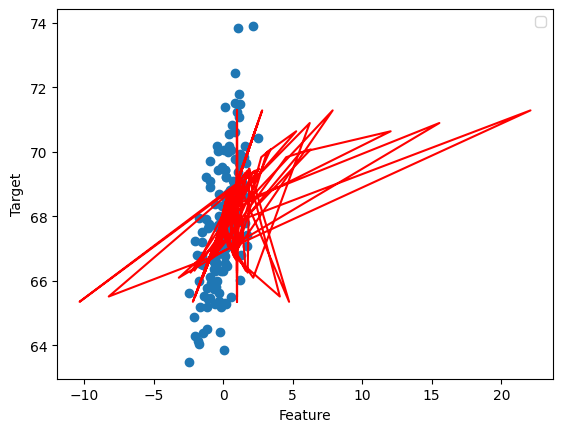

In [66]:
X_train_indices = np.argsort(X_train.flatten())
# This sorts the indices of X_train
X_sorted = X_train[X_train_indices]# This is done to plot the line correctly
X_poly_sorted = poly.transform(X_sorted)
plt.scatter(X_train, y_train)
# plt.plot(X_poly_sorted, model.predict(X_poly_sorted), color='g')
plt.plot(poly_X_test, model.predict(poly_X_test), color='r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()